# Part I - Prosper Loan Data Exploratory Analysis
## by Victor Oguche

## Introduction
The Prosper Loan dataset is a collection of loan records.
Using the Prosper Loan dataset, Exploratory and Explanatory analysis will be carried out with the aim of finding trends, patterns and insight from the loan dataset.

To achieve this, the following questions will be answered in the analysis:
- What are the main features from the loan dataset.
- How does the main feature correlates with otherfeatures in the loan dataset.
- The distrubtion of the features 
- Features that drive the loan records based off the dataset

38 columns out of the orignal 81 columns will be used for this exploratory analysis.

## Preliminary Wrangling


In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

from matplotlib.font_manager import FontProperties
font_pro = FontProperties()
font_pro.set_size('small')

## Functions 

In [4]:
def gridboxplot(x_var, y_var, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x_var, y=y_var, color=default_color)

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [5]:
# load in the dataset into a pandas dataframe
df_loan = pd.read_csv('prosperLoanData.csv')

## Assessing Data
Assessing collected dataset

In [6]:
# high-level overview of data shape and composition
df_loan.shape

(113937, 81)

In [7]:
df_loan.head(10)

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5  0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   
6  0F0A3576754255009D63151         750899  2013-04-12 09:52:56.147000000   
7  0F1035772717087366F9EA7         768193  2013-05-05 06:49:27.493000000   
8  0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   
9  0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   
5         NaN    60    Current                  NaN      0.15425   
6         NaN    36    Current                  NaN      0.31032   
7         NaN    36    Current                  NaN      0.23939   
8         NaN    36    Current                  NaN      0.07620   
9         NaN    36    Current                  NaN      0.07620   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18                0.0   
1        0.0920       0.0820  ...            0.00                0.0   
2        0.2750       0.2400  ...          -24.20                0.0   
3        0.0974       0.0874  ...         -108.01                0.0   
4        0.2085       0.1985  ...          -60.27                0.0   
5        0.1314       0.1214  ...          -25.33                0.0   
6        0.2712       0.2612  ...          -22.95                0.0   
7        0.2019       0.1919  ...          -69.21                0.0   
8        0.0629       0.0529  ...          -16.77                0.0   
9        0.0629       0.0529  ...          -16.77                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   
5                    0.0                  0.0                             0.0   
6                    0.0                  0.0                             0.0   
7                    0.0                  0.0                             0.0   
8                    0.0                  0.0                             0.0   
9                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   
5            1.0                0                          0   
6            1.0                0                          0   
7            1.0                0                          0   
8            1.0                0                          0   
9            1.0                0                          0   

  InvestmentFromFriendsAmount Investors 

In [8]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [9]:
# Drop columns not needed in the exploration and analysis
df_loan = df_loan.drop(['ListingKey','ListingNumber',
'ScorexChangeAtTimeOfListing',
'ListingCreationDate',
'CreditGrade',
'ClosedDate',
'ProsperRating (numeric)',
'EmploymentStatusDuration',
'CurrentlyInGroup',
'GroupKey',
'DateCreditPulled',
'CreditScoreRangeLower',
'CreditScoreRangeUpper',
'FirstRecordedCreditLine',
'CurrentCreditLines',
'OpenCreditLines',
'TotalCreditLinespast7years',
'OpenRevolvingAccounts',
'OpenRevolvingMonthlyPayment',
'InquiriesLast6Months',
'TotalInquiries',
'PublicRecordsLast10Years',
'PublicRecordsLast12Months',
'RevolvingCreditBalance',
'BankcardUtilization',
'TotalTrades',
'TradesNeverDelinquent (percentage)',
'TradesOpenedLast6Months',
'LoanKey',
'LoanFirstDefaultedCycleNumber',
'LoanMonthsSinceOrigination',
'LoanNumber',
'LoanOriginationDate',
'LoanOriginationQuarter',
'MemberKey',
'LP_CustomerPayments',
'LP_CustomerPrincipalPayments',
'LP_InterestandFees',
'LP_ServiceFees',
'LP_CollectionFees',
'LP_GrossPrincipalLoss',
'LP_NetPrincipalLoss',
'LP_NonPrincipalRecoverypayments',
], axis = 1)

In [10]:
# view stat of retained columns
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 38 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Term                                 113937 non-null  int64  
 1   LoanStatus                           113937 non-null  object 
 2   BorrowerAPR                          113912 non-null  float64
 3   BorrowerRate                         113937 non-null  float64
 4   LenderYield                          113937 non-null  float64
 5   EstimatedEffectiveYield              84853 non-null   float64
 6   EstimatedLoss                        84853 non-null   float64
 7   EstimatedReturn                      84853 non-null   float64
 8   ProsperRating (Alpha)                84853 non-null   object 
 9   ProsperScore                         84853 non-null   float64
 10  ListingCategory (numeric)            113937 non-null  int64  
 11  BorrowerState

### Quality issues
- Erroneous datatypes
- prosper loan value for TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate, ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed and ProsperPrincipalOutstanding  was null if the borrower has no prior loans. This is to be set to zero.
- listing category is numeric. while they are classification. The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

In [11]:
# make a copy of dataset for cleaning
df_loan_clean = df_loan.copy()

### Issue:
Erroneous datatypes

### Define:
Correct the datatype for 
LoanStatus, 
ProsperRating, 
ListingCategory, 
EmploymentStatus, 
CurrentDelinquencies, 
DelinquenciesLast7Years, 
TotalProsperLoans, 
TotalProsperPaymentsBilled, 
OnTimeProsperPayments, 
ProsperPaymentsLessThanOneMonthLate, 
ProsperPaymentsOneMonthPlusLate, 
LoanOriginalAmount


### Code:

In [12]:
# Change wrong datatype
df_loan_clean['CurrentDelinquencies'] = df_loan_clean['CurrentDelinquencies'].astype(int, errors ='ignore')
df_loan_clean['DelinquenciesLast7Years'] = df_loan_clean['DelinquenciesLast7Years'].astype(int, errors ='ignore')
df_loan_clean['TotalProsperLoans'] = df_loan_clean['TotalProsperLoans'].astype(int, errors ='ignore')
df_loan_clean['TotalProsperPaymentsBilled'] = df_loan_clean['TotalProsperPaymentsBilled'].astype(int, errors ='ignore')
df_loan_clean['OnTimeProsperPayments'] = df_loan_clean['OnTimeProsperPayments'].astype(int, errors ='ignore')
df_loan_clean['ProsperPaymentsLessThanOneMonthLate'] = df_loan_clean['ProsperPaymentsLessThanOneMonthLate'].astype(int, errors ='ignore')
df_loan_clean['ProsperPaymentsOneMonthPlusLate'] = df_loan_clean['ProsperPaymentsOneMonthPlusLate'].astype(int, errors ='ignore')
df_loan_clean['LoanOriginalAmount'] = df_loan_clean['LoanOriginalAmount'].astype(float, errors ='ignore')

In [13]:
#change datatype
df_loan_clean['ListingCategory (numeric)'] = df_loan_clean['ListingCategory (numeric)'].astype(str)

In [14]:
# convert ordinal columns into ordered categorical types
ordinal_var_dict = {
    'ProsperRating (Alpha)': ['HR','E','D','C','B', 'A','AA'],
    'IncomeRange': ['Not displayed','Not employed', '$0','$1-24,999','$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+',]
                   }

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df_loan_clean[var] = df_loan_clean[var].astype(ordered_var)

In [15]:
# convert Nominal columns into categorical types
nominal_var_dict = { 'LoanStatus': ['Current', 'Completed', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'],
    'ListingCategory (numeric)': ['0', '1','2', '3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19', '20'],
    'EmploymentStatus': ['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other', 'Not employed', 'Part-time', 'Retired'], 'BorrowerState': ['CO', 'GA', 'MN', 'NM', 'KS', 'CA', 'IL', 'MD', 'AL', 'AZ',
       'VA', 'FL', 'PA', 'OR', 'MI', 'NY', 'LA', 'WI', 'OH', 'NC', 'WA',
       'NV', 'NJ', 'TX', 'AR', 'SC', 'DE', 'MO', 'NE', 'UT', 'DC', 'MA',
       'CT', 'IN', 'KY', 'OK', 'MS', 'WV', 'RI', 'TN', 'ID', 'MT', 'HI',
       'NH', 'VT', 'WY', 'ME', 'AK', 'IA', 'SD', 'ND'],
    'Occupation': ['Other', 'Professional', 'Skilled Labor', 'Executive',
       'Sales - Retail', 'Laborer', 'Food Service', 'Fireman',
       'Waiter/Waitress', 'Construction', 'Computer Programmer',
       'Sales - Commission', 'Retail Management', 'Engineer - Mechanical',
       'Military Enlisted', 'Clerical', 'Teacher', 'Clergy',
       'Accountant/CPA', 'Attorney', 'Nurse (RN)', 'Analyst',
       "Nurse's Aide", 'Investor', 'Realtor', 'Flight Attendant',
       'Nurse (LPN)', 'Military Officer', 'Food Service Management',
       'Truck Driver', 'Administrative Assistant',
       'Police Officer/Correction Officer', 'Social Worker',
       'Tradesman - Mechanic', 'Medical Technician', 'Professor',
       'Postal Service', 'Civil Service', 'Pharmacist',
       'Tradesman - Electrician', 'Scientist', 'Dentist',
       'Engineer - Electrical', 'Architect', 'Landscaping',
       'Tradesman - Carpenter', 'Bus Driver', 'Tradesman - Plumber',
       'Engineer - Chemical', 'Doctor', 'Chemist',
       'Student - College Senior', 'Principal', "Teacher's Aide",
       'Pilot - Private/Commercial', 'Religious', 'Homemaker',
       'Student - College Graduate Student', 'Student - Technical School',
       'Psychologist', 'Biologist', 'Student - College Sophomore',
       'Judge', 'Student - College Junior', 'Car Dealer',
       'Student - Community College', 'Student - College Freshman']
}

for var in nominal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype( categories = nominal_var_dict[var])
    df_loan_clean[var] = df_loan_clean[var].astype(ordered_var)

### test:

In [16]:
#test
df_loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 38 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   Term                                 113937 non-null  int64   
 1   LoanStatus                           113937 non-null  category
 2   BorrowerAPR                          113912 non-null  float64 
 3   BorrowerRate                         113937 non-null  float64 
 4   LenderYield                          113937 non-null  float64 
 5   EstimatedEffectiveYield              84853 non-null   float64 
 6   EstimatedLoss                        84853 non-null   float64 
 7   EstimatedReturn                      84853 non-null   float64 
 8   ProsperRating (Alpha)                84853 non-null   category
 9   ProsperScore                         84853 non-null   float64 
 10  ListingCategory (numeric)            113937 non-null  category
 11  

### Issue:
Null placed instead of zero if the borrower has no prior loans.

### Define:
prosper loan value for TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate, ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed and ProsperPrincipalOutstanding was null if the borrower has no prior loans. This is to be set to zero.

### Code:

In [17]:
# from the dataset dictionary, value will be null if the borrower has no prior loans. so set null to zero for prosper based columns
df_loan_clean['TotalProsperLoans'] = df_loan_clean['TotalProsperLoans'].fillna(0)
df_loan_clean['TotalProsperPaymentsBilled'] = df_loan_clean['TotalProsperPaymentsBilled'].fillna(0)
df_loan_clean['OnTimeProsperPayments'] = df_loan_clean['OnTimeProsperPayments'].fillna(0)
df_loan_clean['ProsperPaymentsLessThanOneMonthLate'] = df_loan_clean['ProsperPaymentsLessThanOneMonthLate'].fillna(0)
df_loan_clean['ProsperPaymentsOneMonthPlusLate'] = df_loan_clean['ProsperPaymentsOneMonthPlusLate'].fillna(0)
df_loan_clean['ProsperPrincipalBorrowed'] = df_loan_clean['ProsperPrincipalBorrowed'].fillna(0)
df_loan_clean['ProsperPrincipalOutstanding'] = df_loan_clean['ProsperPrincipalOutstanding'].fillna(0)

### test:

In [18]:
df_loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 38 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   Term                                 113937 non-null  int64   
 1   LoanStatus                           113937 non-null  category
 2   BorrowerAPR                          113912 non-null  float64 
 3   BorrowerRate                         113937 non-null  float64 
 4   LenderYield                          113937 non-null  float64 
 5   EstimatedEffectiveYield              84853 non-null   float64 
 6   EstimatedLoss                        84853 non-null   float64 
 7   EstimatedReturn                      84853 non-null   float64 
 8   ProsperRating (Alpha)                84853 non-null   category
 9   ProsperScore                         84853 non-null   float64 
 10  ListingCategory (numeric)            113937 non-null  category
 11  

### Issue:
ListingCategory (numeric) not interpreted in values 

### Define:
Change ListingCategory (numeric) values to the specifications 

### Code:

In [19]:
df_loan_clean['ListingCategory (numeric)'] = df_loan_clean['ListingCategory (numeric)'].replace(['0', '1','2', '3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19', '20'],
                                                                                               ['Not Available', 
                                                                                                'Debt Consolidation', 
                                                                                                'Home Improvement',  'Business', 'Personal Loan', 'Student Use', 'Auto', 'Other', 'Baby&Adoption', 
                                                                                                'Boat',  'Cosmetic Procedure',  'Engagement Ring',  'Green Loans',  'Household Expenses', 
                                                                                                'Large Purchases',  'Medical/Dental',  'Motorcycle',  'RV',  'Taxes',  'Vacation',  'Wedding Loans'])

In [20]:
# rename column
df_loan_clean = df_loan_clean.rename(columns = {'ListingCategory (numeric)' : 'ListingCategory'})

### test: 

In [21]:
df_loan_clean['ListingCategory'].unique()

array(['Not Available', 'Home Improvement', 'Motorcycle',
       'Debt Consolidation', 'Other', 'Household Expenses', 'Auto',
       'Medical/Dental', 'Wedding Loans', 'Vacation', 'Business', 'Taxes',
       'Baby&Adoption', 'Personal Loan', 'Engagement Ring',
       'Large Purchases', 'Student Use', 'Boat', 'RV',
       'Cosmetic Procedure', 'Green Loans'], dtype=object)

In [22]:
df_loan_clean.describe()

Term    BorrowerAPR   BorrowerRate    LenderYield  \
count  113937.000000  113912.000000  113937.000000  113937.000000   
mean       40.830248       0.218828       0.192764       0.182701   
std        10.436212       0.080364       0.074818       0.074516   
min        12.000000       0.006530       0.000000      -0.010000   
25%        36.000000       0.156290       0.134000       0.124200   
50%        36.000000       0.209760       0.184000       0.173000   
75%        36.000000       0.283810       0.250000       0.240000   
max        60.000000       0.512290       0.497500       0.492500   

       EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  ProsperScore  \
count             84853.000000   84853.000000     84853.000000  84853.000000   
mean                  0.168661       0.080306         0.096068      5.950067   
std                   0.068467       0.046764         0.030403      2.376501   
min                  -0.182700       0.004900        -0.182700      1.000000   
25%                   0.115670       0.042400         0.074080      4.000000   
50%                   0.161500       0.072400         0.091700      6.000000   
75%                   0.224300       0.112000         0.116600      8.000000   
max                   0.319900       0.366000         0.283700     11.000000   

       CurrentDelinquencies  AmountDelinquent  ...  ProsperPrincipalBorrowed  \
count         113240.000000     106315.000000  ...             113937.000000   
mean               0.592052        984.507059  ...               1642.232196   
std                1.978707       7158.270157  ...               4670.954909   
min                0.000000          0.000000  ...                  0.000000   
25%                0.000000          0.000000  ...                  0.000000   
50%                0.000000          0.000000  ...                  0.000000   
75%                0.000000          0.000000  ...                  0.000000   
max               83.000000     463881.000000  ...              72499.000000   

       ProsperPrincipalOutstanding  LoanCurrentDaysDelinquent  \
count                113937.000000              113937.000000   
mean                    567.997952                 152.816539   
std                    2037.268511                 466.320254   
min                       0.000000                   0.000000   
25%                       0.000000                   0.000000   
50%                       0.000000                   0.000000   
75%                       0.000000                   0.000000   
max                   23450.950000                2704.000000   

       LoanOriginalAmount  MonthlyLoanPayment  PercentFunded  Recommendations  \
count        113937.00000       113937.000000  113937.000000    113937.000000   
mean           8337.01385          272.475783       0.998584         0.048027   
std            6245.80058          192.697812       0.017919         0.332353   
min            1000.00000            0.000000       0.700000         0.000000   
25%            4000.00000          131.620000       1.000000         0.000000   
50%            6500.00000          217.740000       1.000000         0.000000   
75%           12000.00000          371.580000       1.000000         0.000000   
max           35000.00000         2251.510000       1.012500        39.000000   

       InvestmentFromFriendsCount  InvestmentFromFriendsAmount      Investors  
count               113937.000000                113937.000000  113937.000000  
mean                     0.023460                    16.550751      80.475228  
std                      0.232412                   294.545422     103.239020  
min                      0.000000                     0.000000       1.000000  
25%                      0.000000                     0.000000       2.000000  
50%                      0.000000                     0.000000      44.000000  
75%                      0.000000                     0.000000     115.00000

### What is the structure of your dataset?

> The Prosper loan dataset contains 113937 loan records and this analysis will make use of 38 features from the loan dataset. Most variables are numeric while 8 of the features are Nominal data and 3 Ordinal data.

### What is/are the main feature(s) of interest in your dataset?

> From this analysis, I am interested in finding features that are key in determining if a borrower is loan worthy.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
 
> I expect that a borrower Stated Monthly Income should impact how much loan they can recieve. Also the Monthly Loan Payment intended is expected to have an impact on the original loan amount. Borrowers with high Prosper score are expected to have good loan history with higher loan original amount though this may not always be the case.

In [23]:
# write out a copy of the cleaned data
df_loan_clean.to_csv('loan clean dataset.csv', index = False)

## Univariate Exploration

To start I will like to dive on the LoanOriginalAmount to see the loan amount distribution.



In [24]:
#get an overview statistics of the column
df_loan_clean['LoanOriginalAmount'].describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

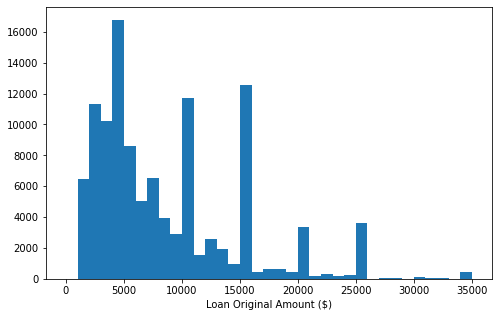

In [25]:
# Distribution view for LoanOriginalAmount
binsize = 1000
bins = np.arange(0, df_loan_clean['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loan_clean, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Loan Original Amount ($)')
plt.show()

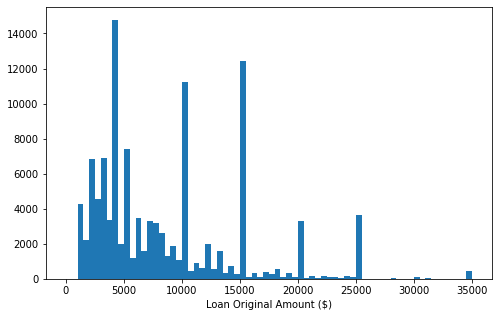

In [26]:
# further investiagtion on smaller bin size
binsize = 500
bins = np.arange(0, df_loan_clean['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loan_clean, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Loan Original Amount ($)')
plt.show()

>Observations:
>> There are about 3 major jump in the Loan Original Amount distribution. 
>> The chart is skewed to the right with high concentration on small loan ammount.
>>Let's log transform the Loan Original Amount to get a more granular view of the distribution.

In [27]:
#log transform the column description to get the min max for bins
np.log10(df_loan_clean['LoanOriginalAmount'].describe())

count    5.056665
mean     3.921011
std      3.795588
min      3.000000
25%      3.602060
50%      3.812913
75%      4.079181
max      4.544068
Name: LoanOriginalAmount, dtype: float64

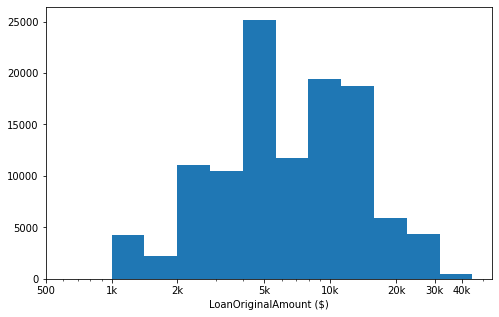

In [28]:
# plot the log transformed 
log_binsize = 0.15
bins = 10 ** np.arange(np.log10(df_loan_clean['LoanOriginalAmount'].min())-log_binsize, np.log10(df_loan_clean['LoanOriginalAmount'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loan_clean, x = 'LoanOriginalAmount', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4,3e4, 4e4], [500, '1k', '2k', '5k', '10k', '20k', '30k', '40k'])
plt.xlabel('LoanOriginalAmount ($)')
plt.show()

>Observation:
>> The transformed plot shows a bimodal distribution with peak frequency about the 5k and 10k loan amount respectively. 
>> The scale chart shows that a large amount of the loan original amount falls in the middle range. While a very few number of the loan records has high loan original amount. 

Next we will look into the Prosper Rating and Income Range to get the distribution of the loan records on ordinal variables.

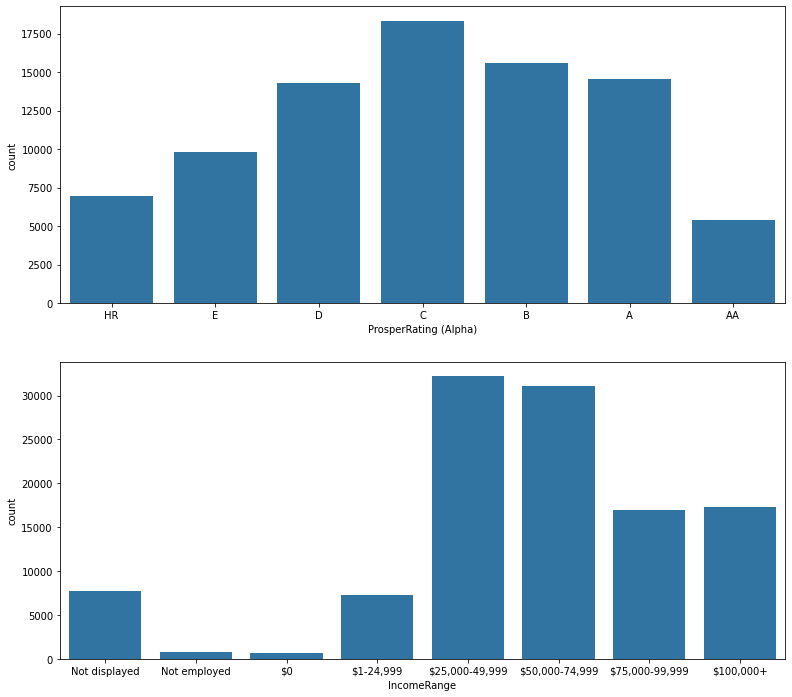

In [29]:
# let's plot the two together to get an idea of each ordinal variable's distribution.

fig, ax = plt.subplots(nrows=2, figsize = [13,12])

default_color = sb.color_palette()[0]
sb.countplot(data = df_loan_clean, x = 'ProsperRating (Alpha)', color = default_color, ax = ax[0])
sb.countplot(data = df_loan_clean, x = 'IncomeRange', color = default_color, ax = ax[1])

plt.show()

>Observation:
    >> Most of the loan have average prosper rating as seen with a high frequency count for C.
    >> Large amount of the loan records are on borrowers with income range between 25,000 and 75,000 dollars.

Furthermore, Let's veiw the distribution for norminal variables

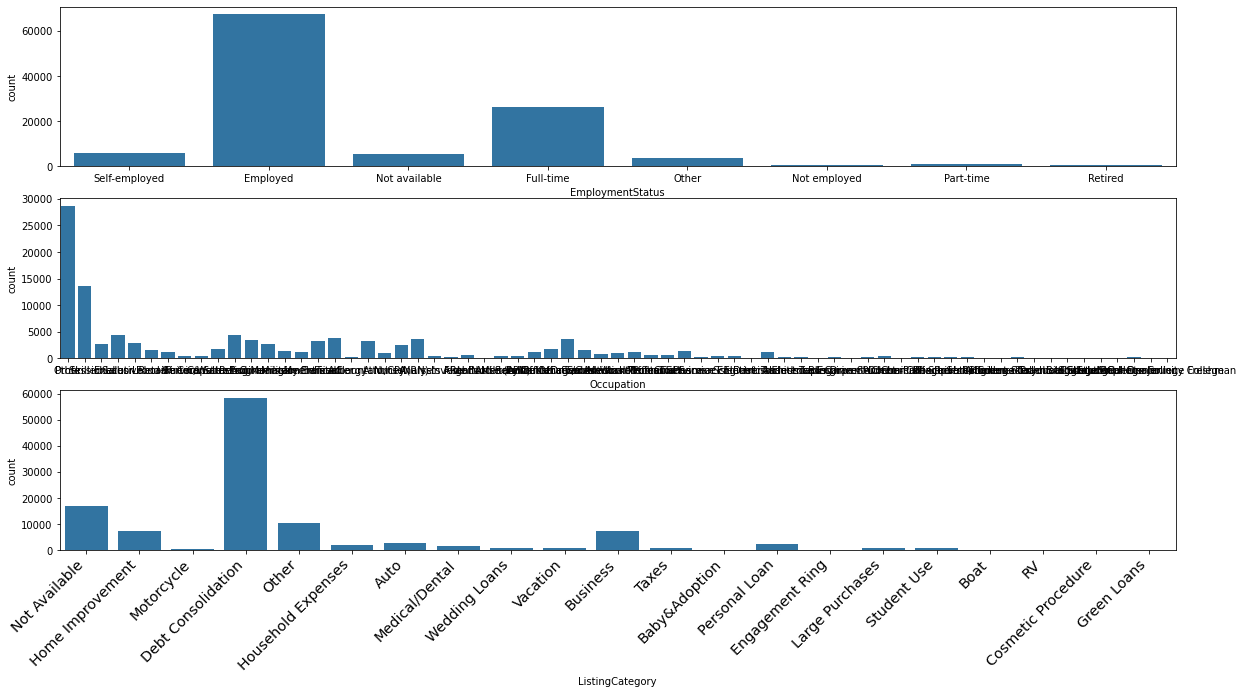

In [30]:
# let's plot occupation and employment status together to get an idea of each norminal variable's distribution.

fig, ax = plt.subplots(nrows=3, figsize = [20,10])

default_color = sb.color_palette()[0]
sb.countplot(data = df_loan_clean, x = 'EmploymentStatus', color = default_color, ax = ax[0])
sb.countplot(data = df_loan_clean, x = 'ListingCategory', color = default_color, ax = ax[2])
sb.countplot(data = df_loan_clean, x = 'Occupation', color = default_color, ax = ax[1])
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()

> Observation:
>> Majority of the loans where given for Debt Consolidation. Using the loan to pay off other loans
>> From the norminal plot more loans are given to employed borrower as expected. There is an occupation with very high count in recieving loans. 
To check this we will need to plot the top 5 highest occupation with loans.

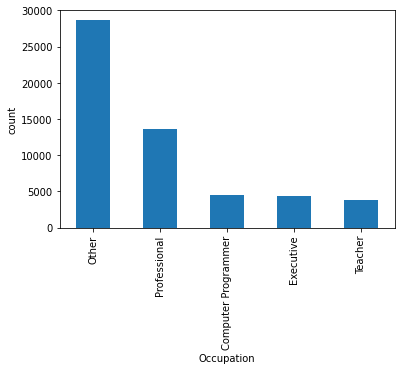

In [31]:
# further plot to get the top 5 occupation recieving loans
df_loan_clean['Occupation'].value_counts().head(5).plot(kind = "bar")
plt.xlabel('Occupation')
plt.ylabel('count')
plt.show()

>> The bulk of the count falls in other category which is expected as many occupations not listed falls in this category.

Let's review the distribution of Stated Monthly Income given by the borrowers

In [32]:
# distribution of StatedMonthlyIncome
#get an overview statistics of the column
df_loan_clean['StatedMonthlyIncome'].describe()

count    1.139370e+05
mean     5.608026e+03
std      7.478497e+03
min      0.000000e+00
25%      3.200333e+03
50%      4.666667e+03
75%      6.825000e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

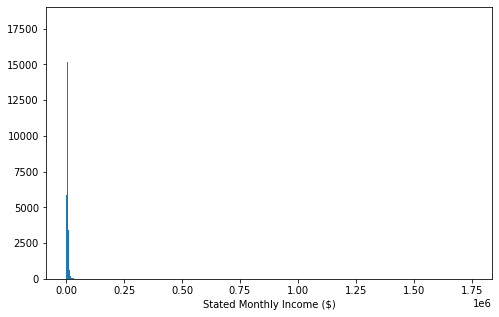

In [33]:
binsize = 1000
bins = np.arange(0, df_loan_clean['StatedMonthlyIncome'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loan_clean, x = 'StatedMonthlyIncome', bins = bins)
plt.xlabel('Stated Monthly Income ($)')
plt.show()

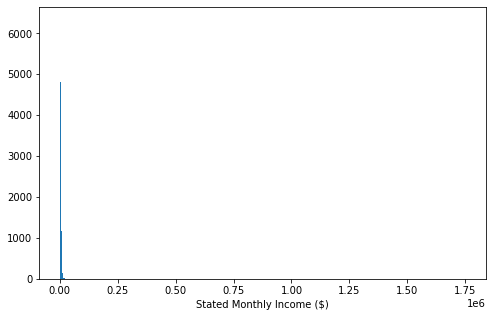

In [34]:
# let's investigate further on smaller bin size
binsize = 250
bins = np.arange(0, df_loan_clean['StatedMonthlyIncome'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loan_clean, x = 'StatedMonthlyIncome', bins = bins)
plt.xlabel('Stated Monthly Income ($)')
plt.show()

>Observation:
>> There is a very large frequency spikes at lower stated monthly income.
Let's trasnform the StatedMonthlyIncome to get a deep view of the distribution

In [35]:
np.log10(df_loan_clean['StatedMonthlyIncome'].describe())

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    5.056665
mean     3.748810
std      3.873814
min          -inf
25%      3.505195
50%      3.669007
75%      3.834103
max      6.243039
Name: StatedMonthlyIncome, dtype: float64

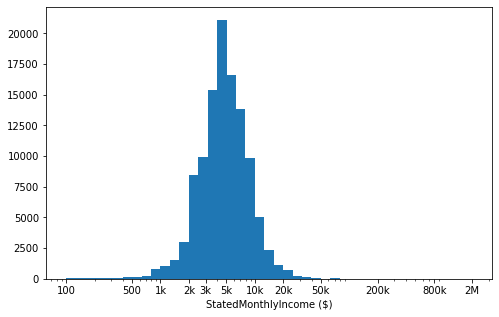

In [36]:
# log transformed plot for deeper investigation 
log_binsize = 0.1
bins = 10 ** np.arange(2, np.log10(df_loan_clean['StatedMonthlyIncome'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loan_clean, x = 'StatedMonthlyIncome', bins = bins)
plt.xscale('log')
plt.xticks([0.1e3,0.5e3, 1e3,2e3,3e3,5e3,10e3,20e3, 50e3, 200e3, 800e3, 2000e3], ['100','500' ,'1k','2k','3k','5k','10k', '20k', '50k', '200k', '800k', '2M'])
plt.xlabel('StatedMonthlyIncome ($)')
plt.show()

> Observation: 
    >> From the chart, Stated Monthly Income has a normal distribution which is expected that loan will be requested more from less earning borrowers while from this number loan will be given more to borrowers with average Stated Monthly Income 

### Insight from Univariate Exploration 

>large amount of the loan original amount falls in the middle range of the dataset distribution showing the amount of loan given more. While a very few number of the loan records has high loan original amount. 

> Majority of the loans are given for Debt Consolidation (Using the loan to pay off other loans). More of these loans are given to employed borrower which is an expect case.

> As expected, Stated Monthly Income has a normal distribution while from this number loan were given more to borrowers within the average Stated Monthly Income.


## Bivariate Exploration
To start off, I want to look at the pairwise correlations present between features in the data.

In [37]:
numeric_vars = ['Term', 'BorrowerAPR', 'BorrowerRate', 'LenderYield',
       'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn',
        'ProsperScore', 'CurrentDelinquencies', 'AmountDelinquent',
       'DelinquenciesLast7Years', 'AvailableBankcardCredit',
       'DebtToIncomeRatio', 'TotalProsperLoans',
       'TotalProsperPaymentsBilled', 'OnTimeProsperPayments',
       'ProsperPaymentsLessThanOneMonthLate',
       'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed',
       'ProsperPrincipalOutstanding', 'LoanCurrentDaysDelinquent',
       'LoanOriginalAmount', 'MonthlyLoanPayment', 'PercentFunded',
       'Recommendations', 'InvestmentFromFriendsCount',
       'InvestmentFromFriendsAmount', 'Investors']

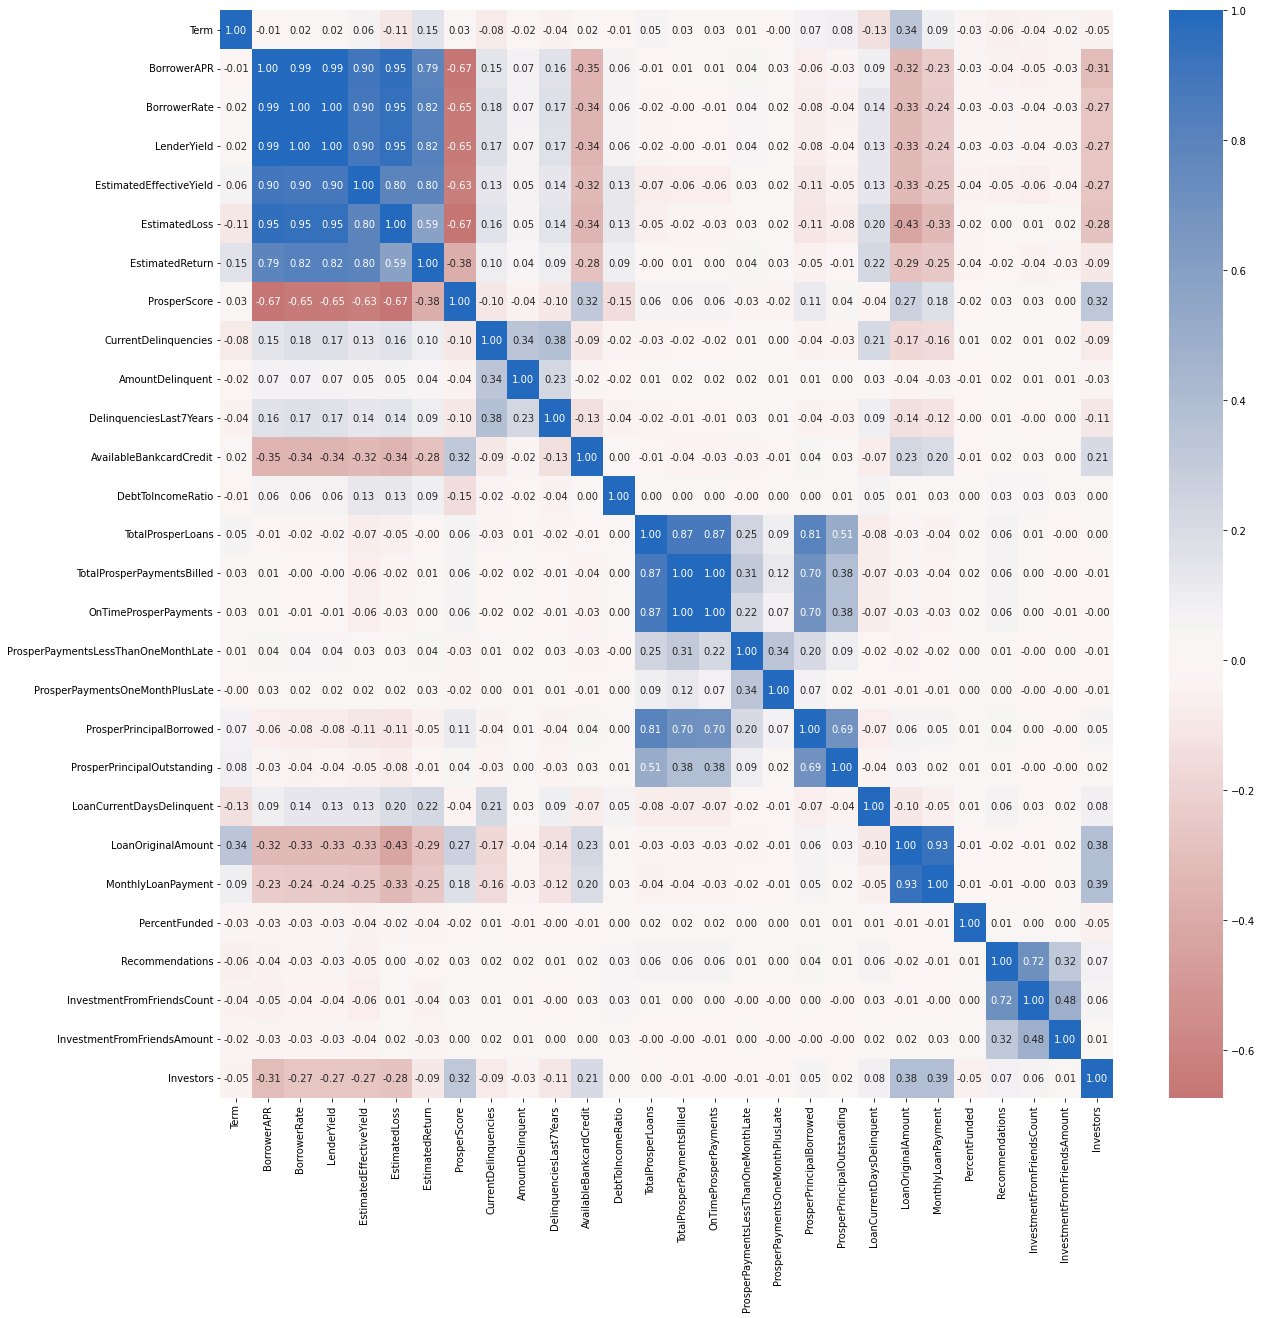

In [38]:
# correlation plot
plt.figure(figsize = [20, 20])
sb.heatmap(df_loan_clean[numeric_vars].corr(), annot = True, fmt = '.2f',cmap = 'vlag_r', center = 0)
plt.show()

> Observation
>> from the heat map. some great numeric correlation are spotted.
>> To get more details on the correlation, scatter plot will be made for the loan orginal amount and features it has good correlation.

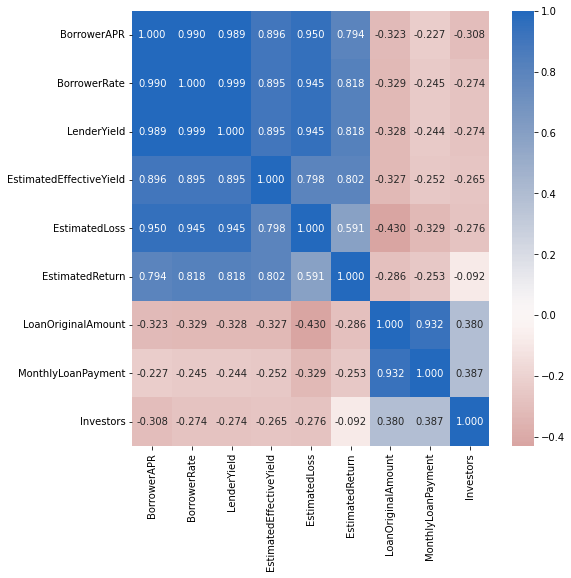

In [39]:
# let's zoom in on the needed correlation from previous heat map
new_numeric_vars = [ 'BorrowerAPR', 'BorrowerRate', 'LenderYield',
       'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn',
       'LoanOriginalAmount', 'MonthlyLoanPayment', 'Investors']

# correlation plot
plt.figure(figsize = [8, 8])
sb.heatmap(df_loan_clean[new_numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


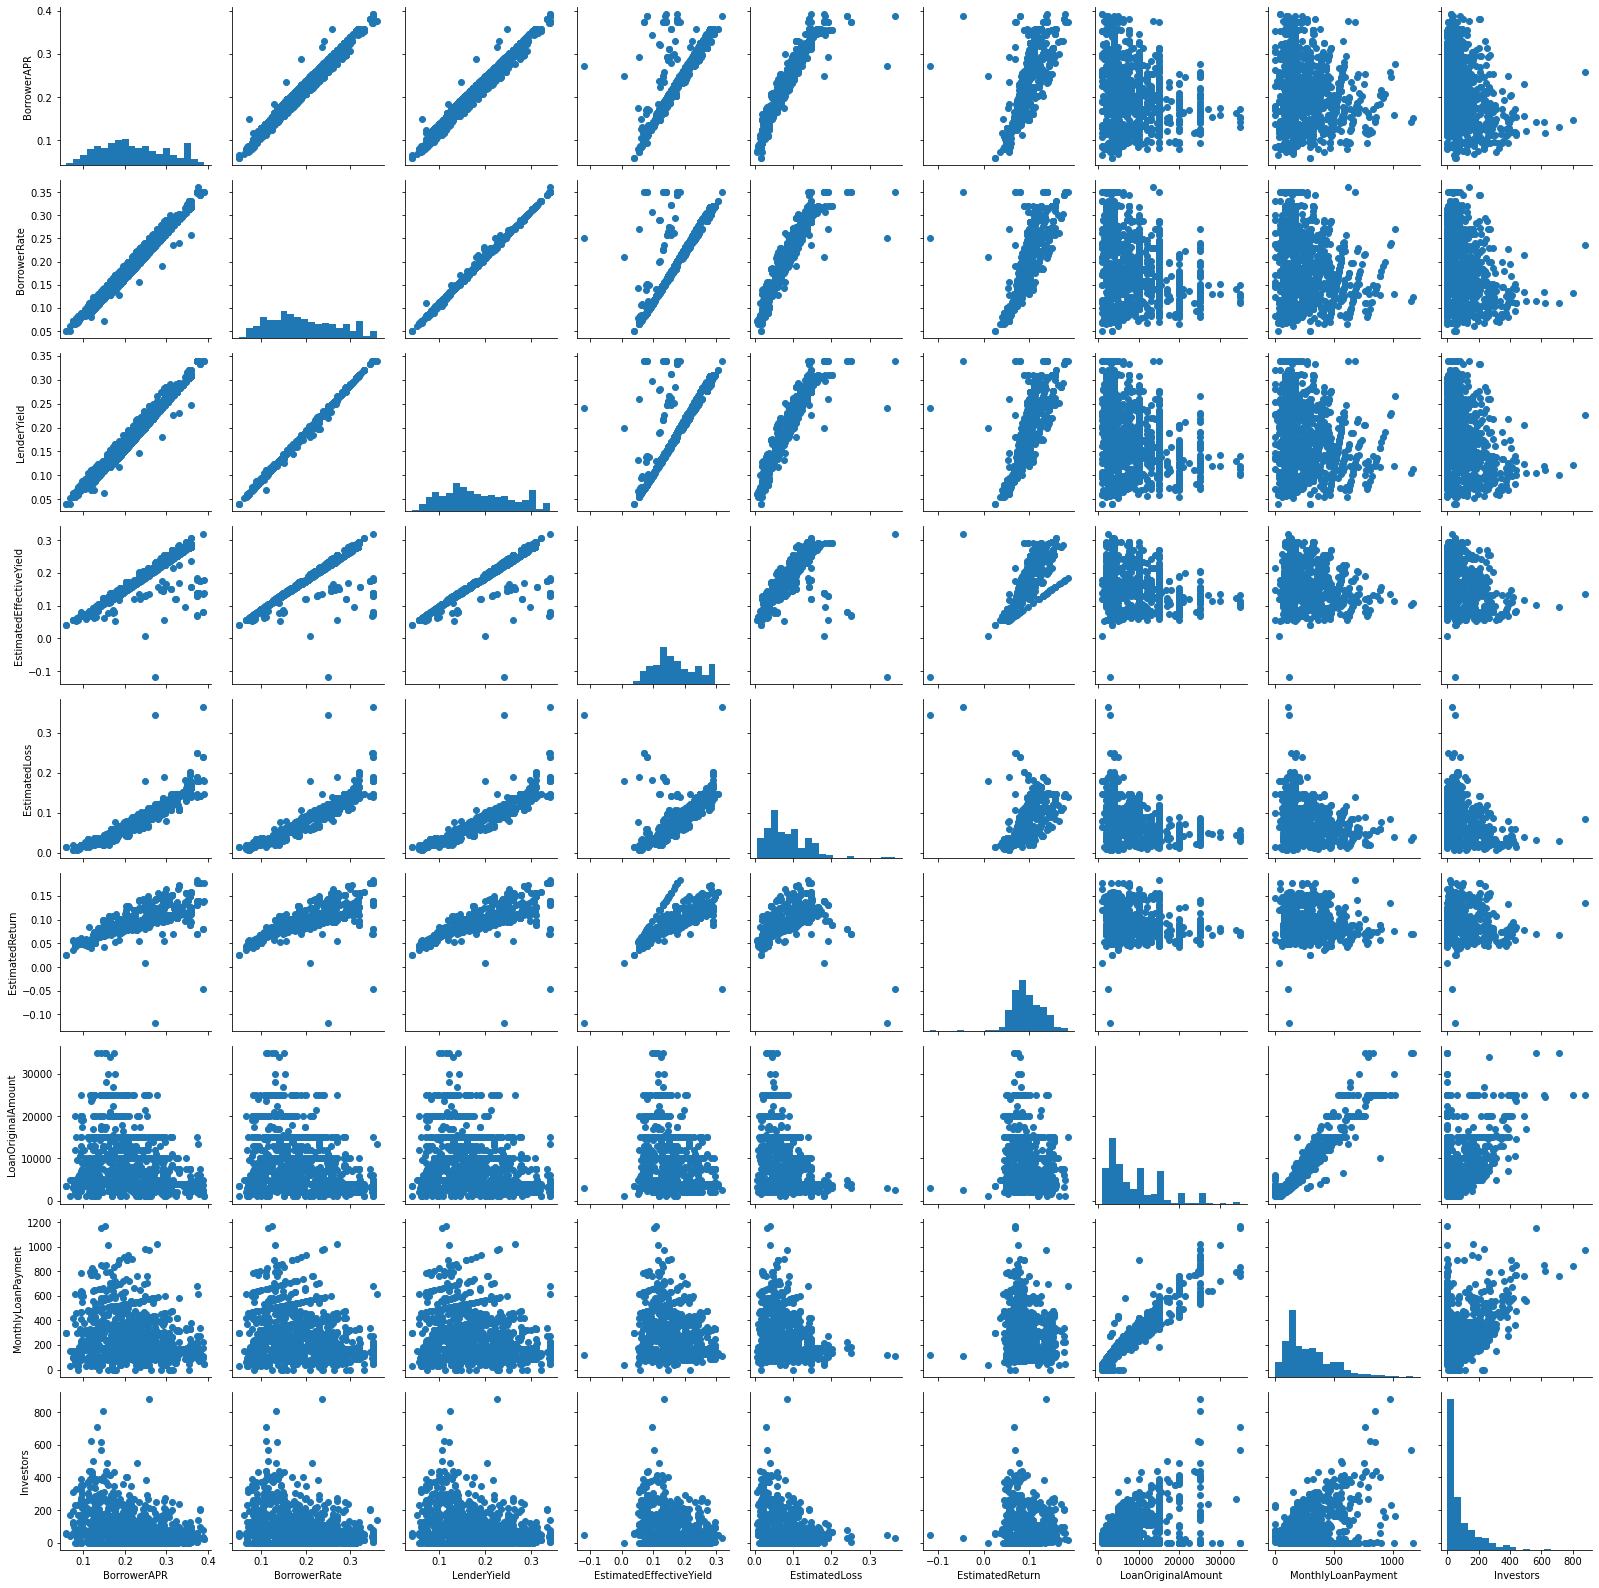

In [40]:
# sampling 1000 loan records so that plots are clearer and they render faster
loan_sample = df_loan_clean.sample(n=1000, replace = False)

graph = sb.PairGrid(data = loan_sample, vars = new_numeric_vars)
graph = graph.map_diag(plt.hist, bins = 20);
graph.map_offdiag(plt.scatter)

As expected, the 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss' and 'EstimatedReturn' all highly correlated with one another as they are resultant of similar computation values.

There is a strong correlation also between 'LoanOriginalAmount' and 'MonthlyLoanPayment' which is expected. Also there seems to be to be a good relation going on for the number of investors that funded the loan compared to the 'LoanOriginalAmount' and 'MonthlyLoanPayment' which is worth extra exploration in this section.

'ProsperScore' has a very strong negative correlation with 'BorrowerAPR', 'BorrowerRate', 'LenderYield','EstimatedEffectiveYield', 'EstimatedLoss' and 'EstimatedReturn'. Further investagtion into this correlation will be needed.

Further investigation will now be done on how 'LoanOriginalAmount' and 'MonthlyLoanPayment' correlate with the Ordinal categorical variables (ProsperRating and IncomeRange).

<Figure size 1296x1296 with 0 Axes>

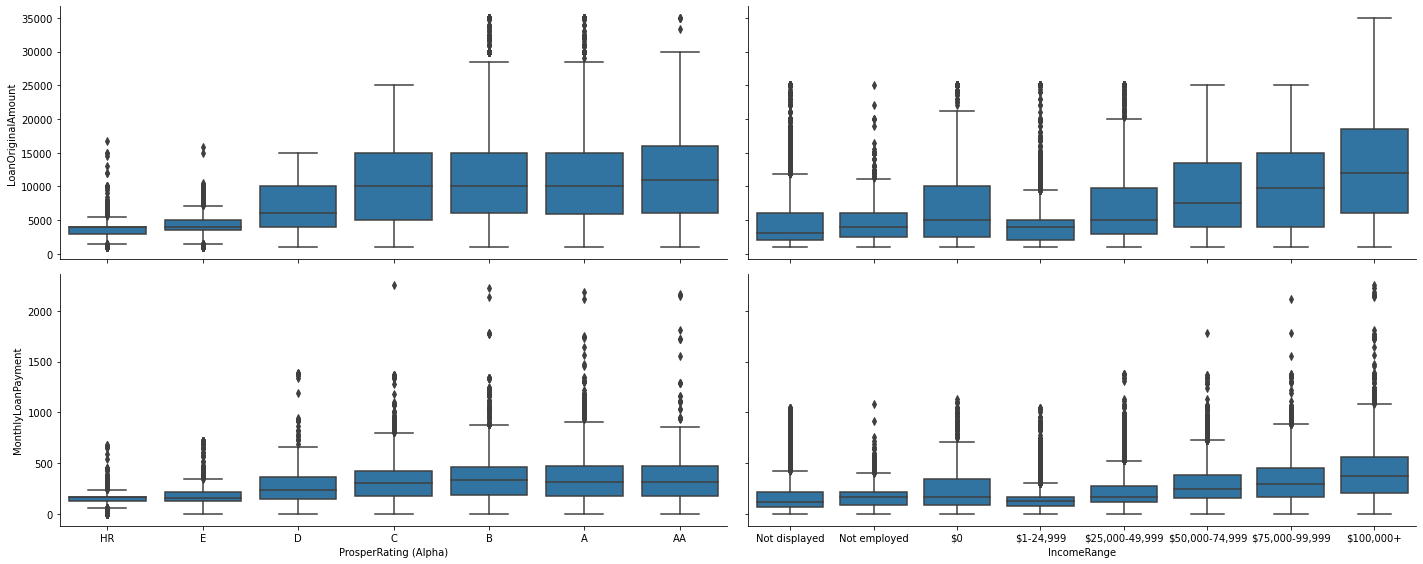

In [41]:
# plotting matrix of 'LoanOriginalAmount' and 'MonthlyLoanPayment' against ProsperRating and IncomeRang.
plt.figure(figsize = [18, 18])
graph = sb.PairGrid(data = df_loan_clean, y_vars = ['LoanOriginalAmount','MonthlyLoanPayment'], x_vars = ['ProsperRating (Alpha)' , 'IncomeRange'],
                height = 4, aspect = 2.5)
graph.map(gridboxplot)
plt.show();

From the plot, it seems that there are some positive relationships between the ordinal categorical variables and the two numeric variables of interest. Borrowers in the AA Prosper Rating having income range above 100,000 seems to get high loan original amount which is expected. Borrowers with 0 dollars stated for incomerange have more higher loan original amount compared to those in the 1-24,999 dollars category. This is not expected and more investigation will be needed on it.

Furthermore, let's look at relationships between 'LoanOriginalAmount' and 'MonthlyLoanPayment' and some norminal category

<Figure size 1296x1296 with 0 Axes>

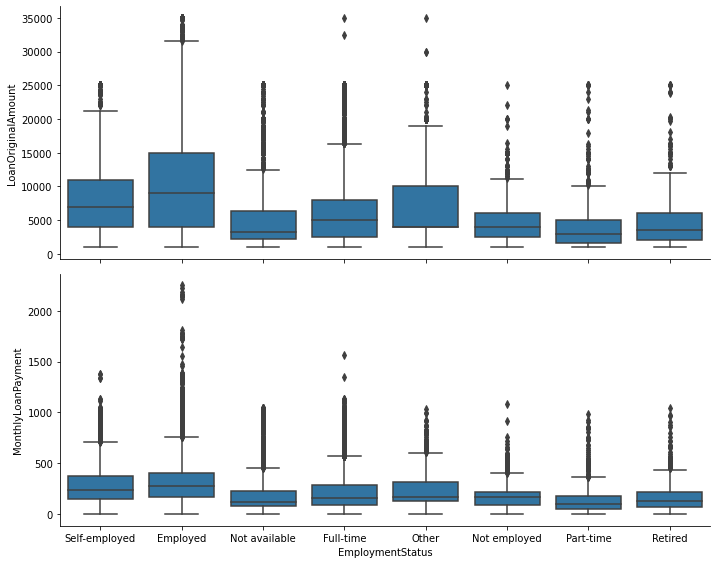

In [42]:
# plotting matrix of 'LoanOriginalAmount' and 'MonthlyLoanPayment' against EmploymentStatus
plt.figure(figsize = [18, 18])
graph = sb.PairGrid(data = df_loan_clean, y_vars = ['LoanOriginalAmount','MonthlyLoanPayment'], x_vars = ['EmploymentStatus'],
                height = 4, aspect = 2.5)
graph.map(gridboxplot)
plt.show();

> Observation:
    >> The plot shows that More higher loan amount are given to employeed borrower. The monthlt loan payment amount is almost same for self-employed and employed borrowers but the mean is higher for employed showing why higher loan amount are given to employed borrowers.

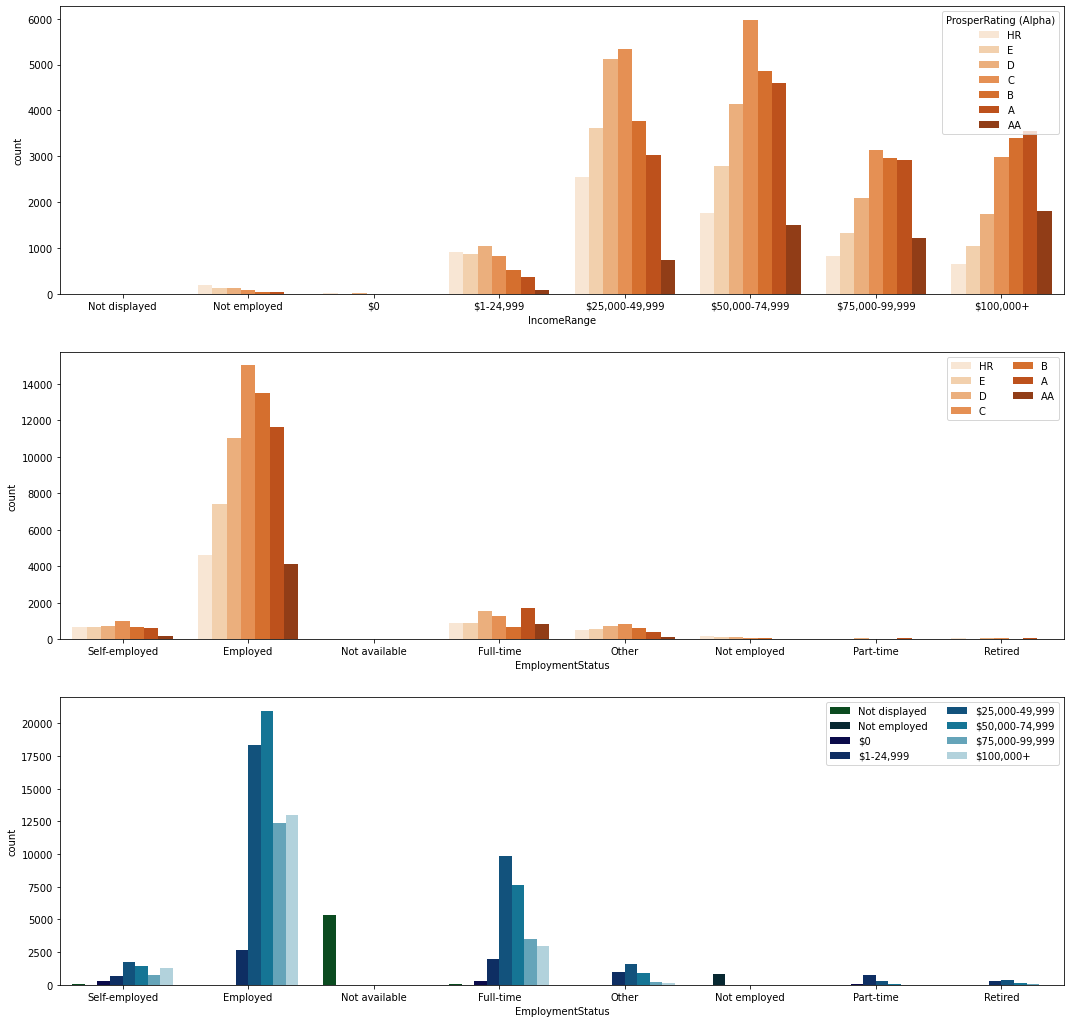

In [43]:
#plot for categorical features
plt.figure(figsize = [18, 18])

# Income range with hue on Prosper rating
plt.subplot(3, 1, 1)
sb.countplot(data = df_loan_clean, x = 'IncomeRange', hue = 'ProsperRating (Alpha)', palette = 'Oranges')

# Employement status with hue on Prosper rating
graph = plt.subplot(3, 1, 2)
sb.countplot(data = df_loan_clean, x = 'EmploymentStatus', hue = 'ProsperRating (Alpha)', palette = 'Oranges')
graph.legend(ncol = 2)

# Employement status with hue on Income Range
graph = plt.subplot(3, 1, 3)
sb.countplot(data = df_loan_clean, x = 'EmploymentStatus', hue = 'IncomeRange', palette = 'ocean')
graph.legend(loc = 1, ncol = 2)

plt.show()

>Observation:
    >> There seems to be more prosper rating going in for borrowers with income range between 25,000 dollars and 75,000 dollars. Also bulk of the rating for employment status are clustered on employed borrowers which is expected as most of the loan given are on this category of borrowers. Looking at the relation between the employment status and the income range, income range were provided more from the employed borrowers with income range of 50,000 - 74,999 dollars leading the chart. 

To close up on the Bivariate Exploration we will dive deep on the 'LoanOriginalAmount' and 'MonthlyLoanPayment' to get more insight on the relationship. Also 'ProsperScore' negative correlation with 'BorrowerAPR', 'BorrowerRate', 'LenderYield','EstimatedEffectiveYield', 'EstimatedLoss' and 'EstimatedReturn' will be investigated.

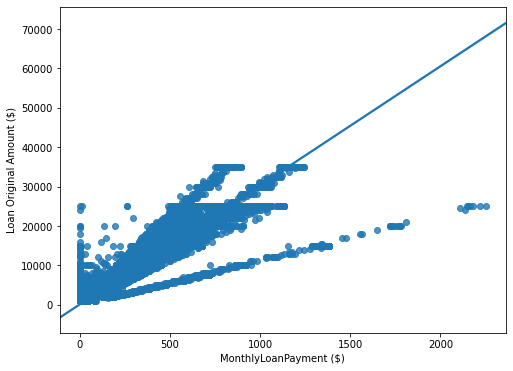

In [44]:
#  'MonthlyLoanPayment' vs  'LoanOriginalAmount'
plt.figure(figsize = [8, 6])
sb.regplot(data = df_loan_clean, y = 'LoanOriginalAmount', x = 'MonthlyLoanPayment', truncate=False)
plt.ylabel('Loan Original Amount ($)')
plt.xlabel('MonthlyLoanPayment ($)')
plt.show()

> From the there is a linear relationship, however there are some deviation and clustered datapoints. Let's have a log transformation of the loan orignal amount to see the trend 

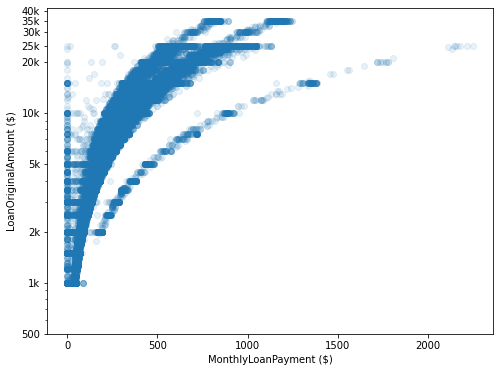

In [45]:
# 'MonthlyLoanPayment' vs  'LoanOriginalAmount', with log transform on 'MonthlyLoanPayment'
plt.figure(figsize = [8, 6])
plt.scatter(data = df_loan_clean, y = 'LoanOriginalAmount', x = 'MonthlyLoanPayment', alpha = 1/10)
plt.xlabel('MonthlyLoanPayment ($)')
plt.yscale('log')
plt.yticks([500, 1e3, 2e3, 5e3, 1e4, 2e4, 2.5e4, 3e4, 3.5e4, 4e4], [500, '1k', '2k', '5k', '10k', '20k', '25k', '30k', '35k', '40k'])
plt.ylabel('LoanOriginalAmount ($)')
plt.show()

From the plot, there appears to be a Loan Original Amount ceiling in the data: given the spread of 'MonthlyLoanPayment' all below Loan Original Amount of 35,000 Dollars. 

Let's veiw how 'ProsperScore' goes with 'BorrowerAPR', 'BorrowerRate', 'LenderYield','EstimatedEffectiveYield', 'EstimatedLoss' and 'EstimatedReturn' for more insight on factors affecting a loan prosper score.

<Figure size 1296x1296 with 0 Axes>

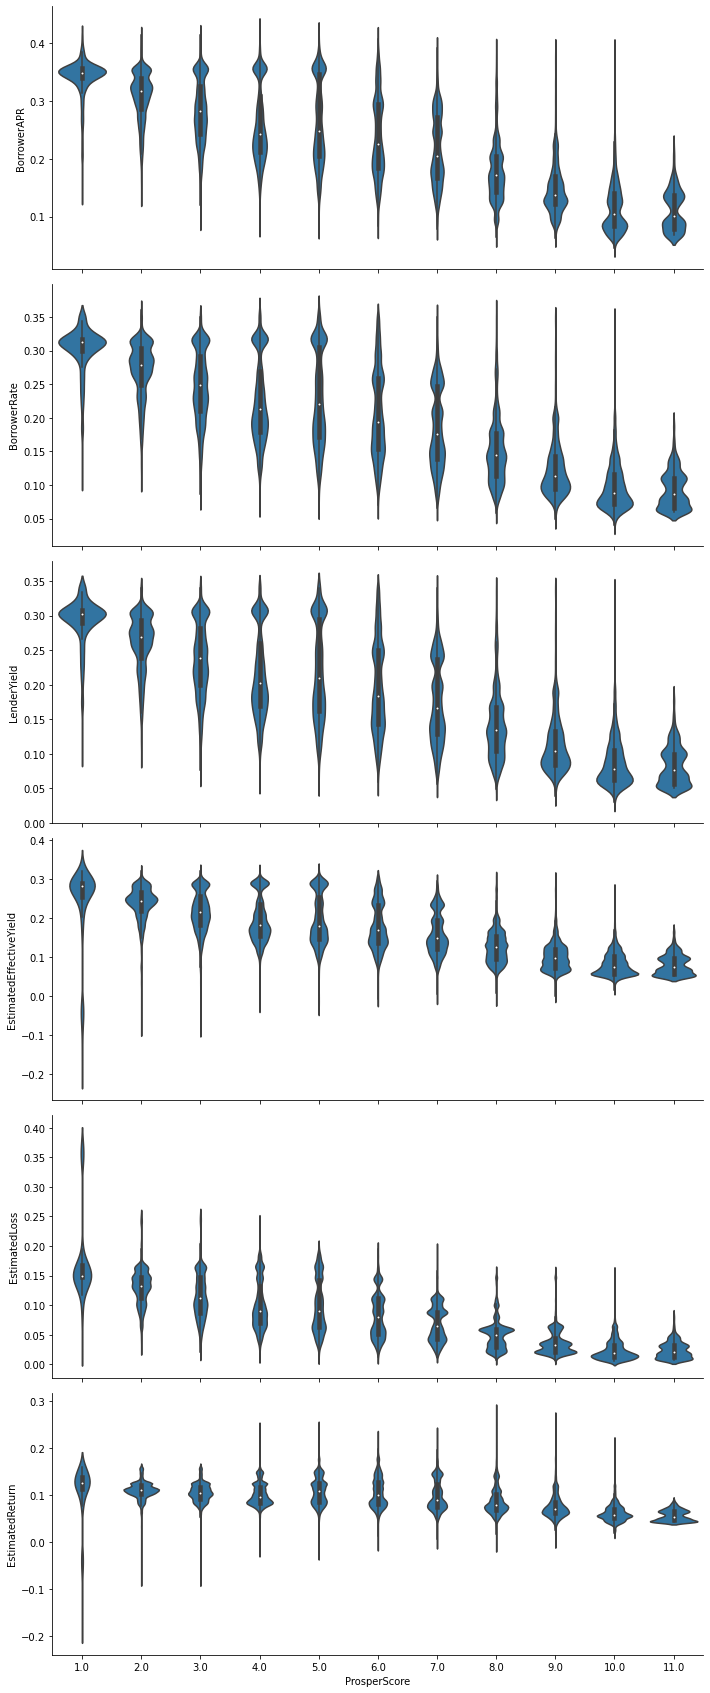

In [46]:
plt.figure(figsize = [18, 18])
graph = sb.PairGrid(data = df_loan_clean, y_vars = [ 'BorrowerAPR', 'BorrowerRate', 'LenderYield','EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn' ], x_vars = ['ProsperScore'],
                height = 4, aspect = 2.5)
graph.map(sb.violinplot, color = default_color)
plt.show();

>Observation
>> From the chart, 'BorrowerAPR', 'BorrowerRate', and 'LenderYield' are of same pattern having higher Prosper score when values are relatively low for the three variables.

Now let's investiagte the number of investors in respect to 'LoanOriginalAmount' and 'MonthlyLoanPayment'

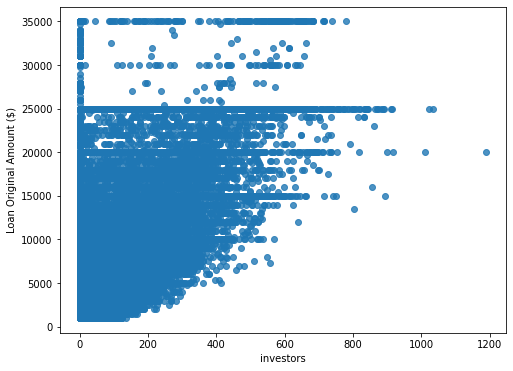

In [47]:
#  plot of LoanOriginalAmount' against Investor Count
plt.figure(figsize = [8, 6])
sb.regplot(data = df_loan_clean, y = 'LoanOriginalAmount', x = 'Investors', truncate=True, fit_reg=False)
plt.ylabel('Loan Original Amount ($)')
plt.xlabel('investors')
plt.show()

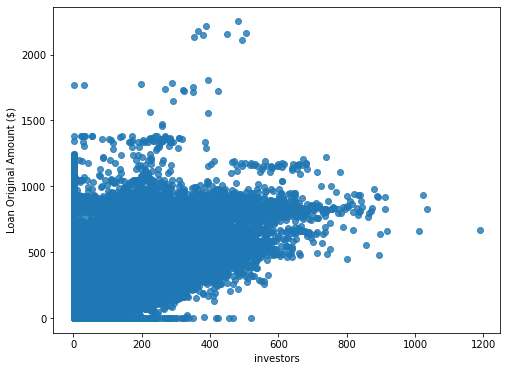

In [48]:
# plot of 'MonthlyLoanPayment' against  'Investors'
plt.figure(figsize = [8, 6])
sb.regplot(data = df_loan_clean, y = 'MonthlyLoanPayment', x = 'Investors', truncate=True, fit_reg=False)
plt.ylabel('Loan Original Amount ($)')
plt.xlabel('investors')
plt.show()

>Observation
>> The charts shows that the Investor count doesn't drive the 'MonthlyLoanPayment' or  'LoanOriginalAmount' as the records are just clustered and not distributed.

### Insight From Bivariate Exploration:

>There was a strong correlation also between 'LoanOriginalAmount' and 'MonthlyLoanPayment' which was expected for loans. Further investigation insight into the correlation showed that there was a cap on Loan Original Amount in the data: given the spread of 'MonthlyLoanPayment' all below Loan Original Amount of 35,000 Dollars. Also Investor number doesn't drive the 'LoanOriginalAmount' or 'MonthlyLoanPayment as the points were clustered and not distributted.


>There was also some interesting insight for the categorical features with respest to Original Loan Amoutn. More higher loan amount were given to employeed borrower. The monthly loan payment amount is almost same for self-employed and employed borrowers but the mean is higher for employed showing why higher loan amount are given to employed borrowers.

> For other features, some good insight were seen where Borrowers in the AA Prosper Rating having income range above 100,000 seems to get high loan original amount which is expected. Borrowers with 0 dollars stated for incomerange have more higher loan original amount compared to those in the 1-24,999 dollars category.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

#### Question: How does the employment status relates with a borrower Monthly loan payment and original loan amount

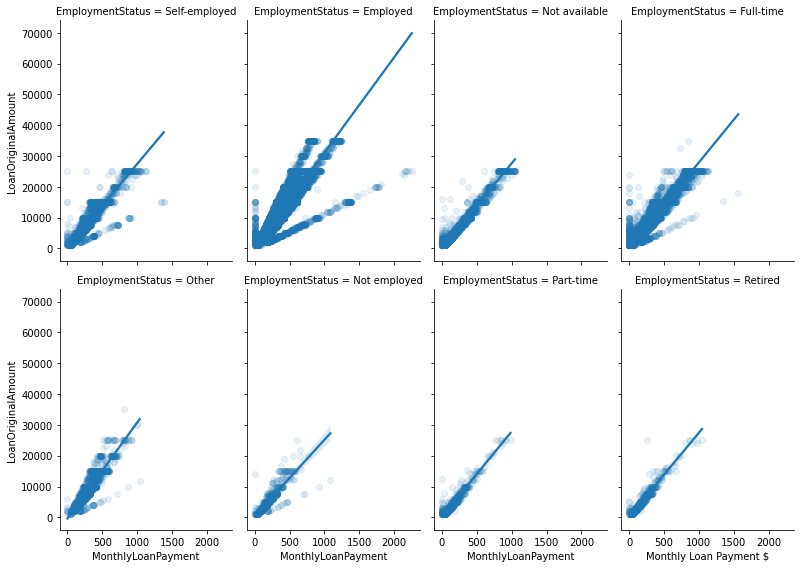

In [49]:
#plot exploration of Loan original Amount against Monthly loan payment based on employment status
graph =sb.FacetGrid(data=df_loan_clean, aspect=0.7, height=4, col_wrap=4, col='EmploymentStatus')
graph.map(sb.regplot,'MonthlyLoanPayment','LoanOriginalAmount', x_jitter=0.04, scatter_kws={'alpha':0.1});
graph.add_legend();
plt.xlabel('Monthly Loan Payment $')
plt.ylabel('Loan Original Amount $')
plt.show()

>Observation
>> From the chart all the employment status category had a positive correlation in respect to Monthly Loan payment and original loan amount. More Full-time employees tend to recieve more loans compared to part-time employee and same case for their monthly loan payment capacity. So one's employment status is a key drive in recieving a personal loan.

#### Question : Whats is the loan amount and maonthly payment effect from income range

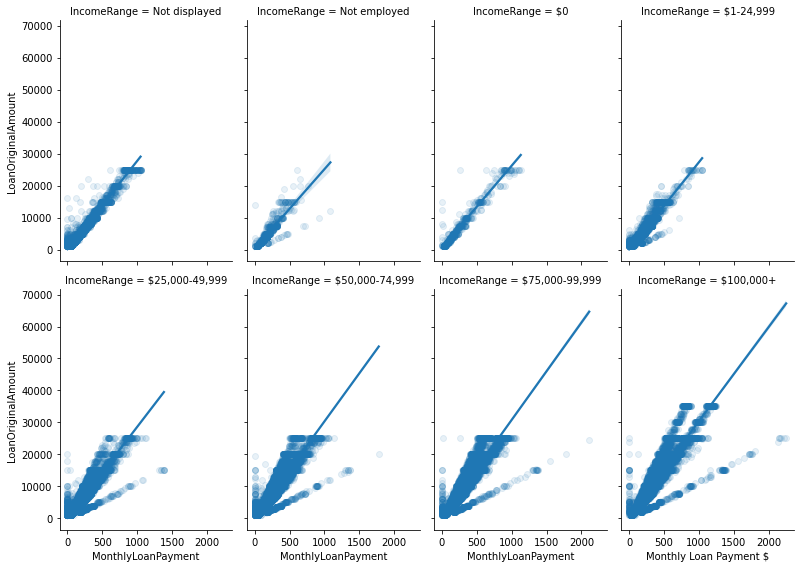

In [50]:
#plot exploration of Loan original Amount against Monthly loan payment based on income range
graph=sb.FacetGrid(data=df_loan_clean, aspect=0.7, height=4, col_wrap=4, col='IncomeRange')
graph.map(sb.regplot,'MonthlyLoanPayment','LoanOriginalAmount', x_jitter=0.04, scatter_kws={'alpha':0.1});
graph.add_legend()
plt.xlabel('Monthly Loan Payment $')
plt.ylabel('Loan Original Amount $')
plt.show()

>Observation:
   >> Income Range above  100,000 dollars tend to have more higher loan amount which is expected because of their income range. Based on the distribution more loans go out for income range above 25,000 which is a save end as the ceiling loan amount from the chart for income range less than 100,000 dollars is about 25,000 dollars.

#### Question : Loan amount and monthly loan payment distribution for listing category 

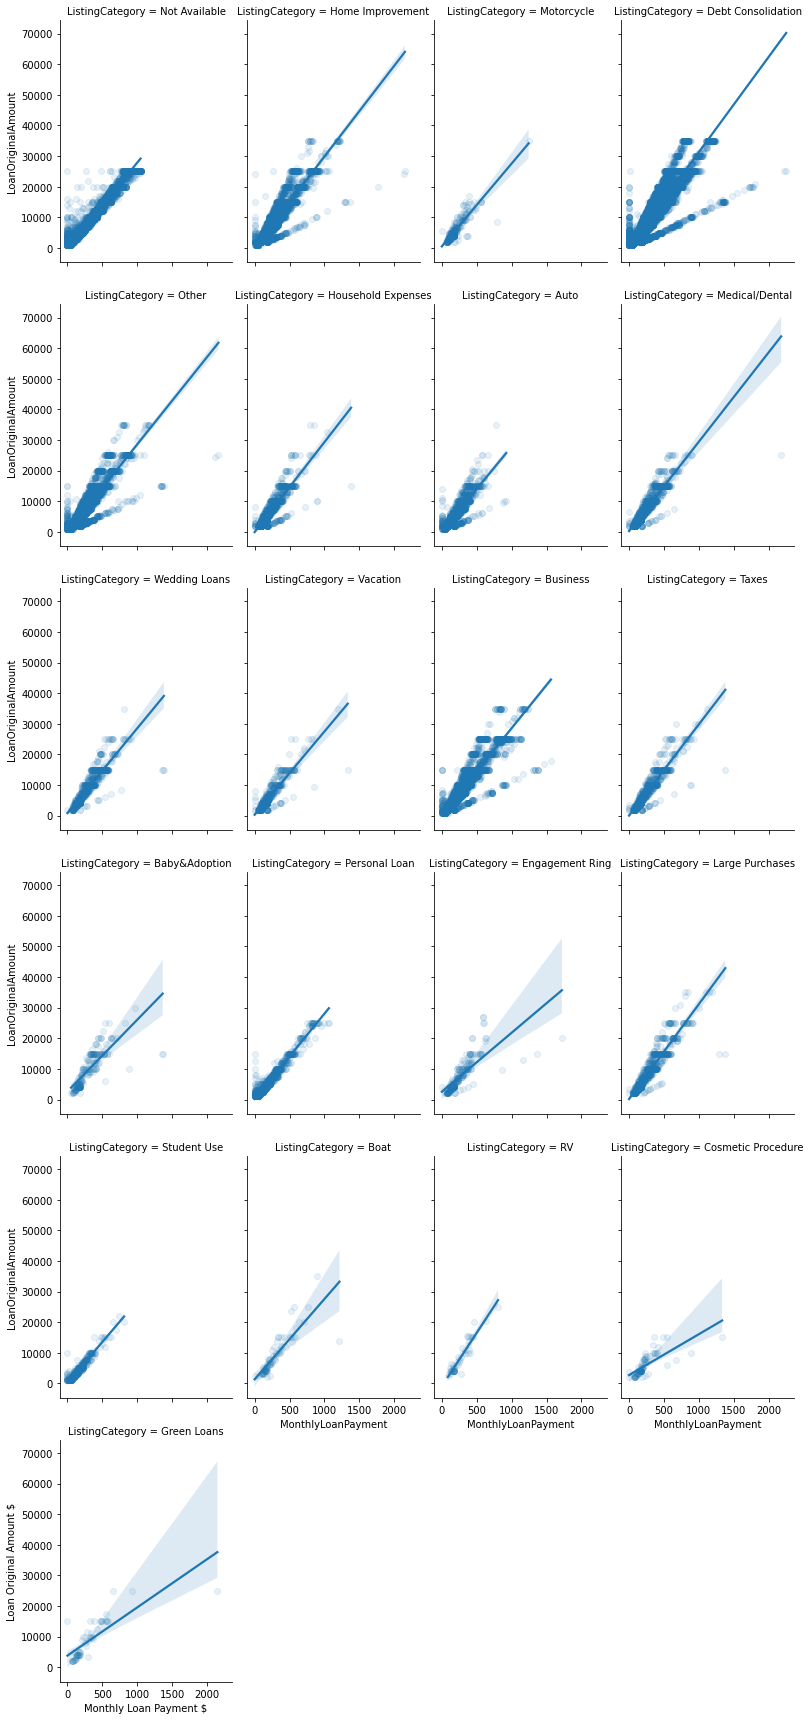

In [51]:
graph=sb.FacetGrid(data=df_loan_clean, aspect=0.7, height=4, col='ListingCategory', col_wrap=4)
graph.map(sb.regplot,'MonthlyLoanPayment','LoanOriginalAmount', scatter_kws={'alpha':0.1}, x_jitter=0.04);
graph.add_legend();
plt.xlabel('Monthly Loan Payment $')
plt.ylabel('Loan Original Amount $')
plt.show()

>Observation:
    >> As seen previous, A huge amount of loan were taken for Debt Consolidation with Home improvemt trailing behind. So companies issing loans should always expect a high influx of loan request for Debt consolidation.

#### Question : How does prosper rating cut across the monthly loan payment and income range

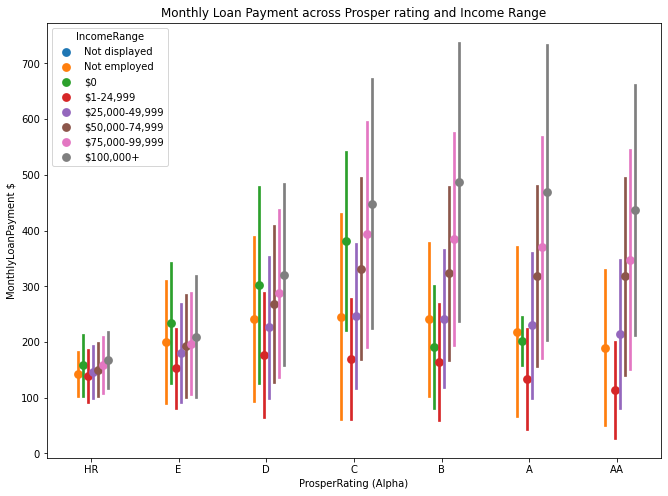

In [52]:
plt.figure(figsize=[ 11, 8])
graph = sb.pointplot(data = df_loan_clean, x = 'ProsperRating (Alpha)', y = 'MonthlyLoanPayment', hue = 'IncomeRange', dodge = 0.4, ci='sd', prop=font_pro, linestyles = '')
plt.title('Monthly Loan Payment across Prosper rating and Income Range')
plt.ylabel('MonthlyLoanPayment $')
graph.set_yticklabels([],minor = True);

>Obsevartion:
    >>Borrowers with stated income range above 50,000 dollars tends to have more high prosper rating showing that Income range plays a good role in the loan overall delivery.

Let's investigate the above more with loan status and see the propser rating pattern.

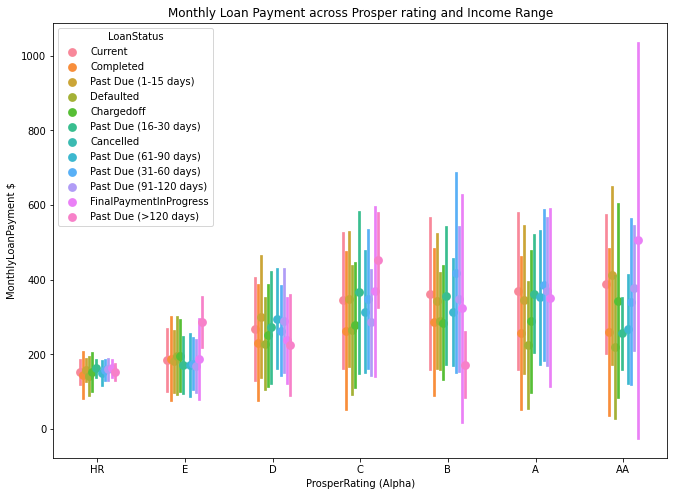

In [53]:
plt.figure(figsize=[ 11, 8])
graph = sb.pointplot(data = df_loan_clean, x = 'ProsperRating (Alpha)', y = 'MonthlyLoanPayment', hue = 'LoanStatus', prop=font_pro, linestyles = '', dodge = 0.4, ci='sd')
plt.title('Monthly Loan Payment across Prosper rating and Income Range')
plt.ylabel('MonthlyLoanPayment $')
graph.set_yticklabels([],minor = True);

> Observation
    >> There seems to be borrowers with high monthly loan payment with past loan due date having a high prosper score. This shows that the impact ratio of the loan status on the score is not relatively high.

#### Question: Prosper rating by income range in respect to their Borrower's Annual Percentage Rate (APR) for the loan.
.

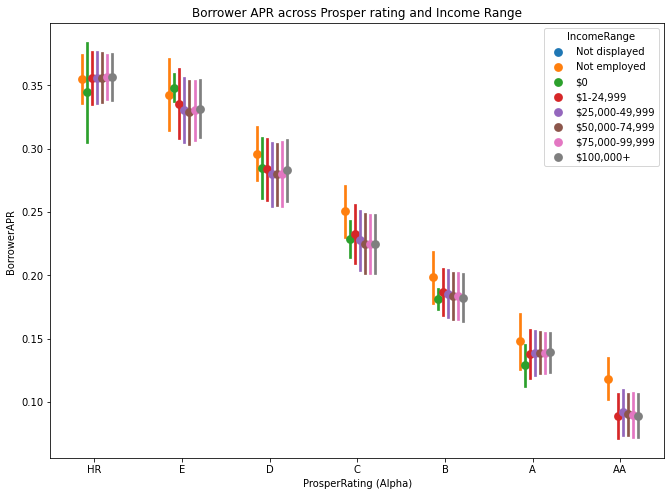

In [54]:
plt.figure(figsize=[ 11, 8])
graph = sb.pointplot(data = df_loan_clean, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'IncomeRange', prop=font_pro, linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across Prosper rating and Income Range')
plt.ylabel('BorrowerAPR ')
graph.set_yticklabels([],minor = True);

>Observation:
    >> From the chart, across all income range the propser rating tends to increase with lower Borrower's Annual Percentage Rate (APR) for the loan. So there is a great impact on the Prosper Loan rating from the Borrower APR and Income range.


#### Question :Investiagte the pattern difference for loan amount and monthly loan payment in respect to boolean category features 

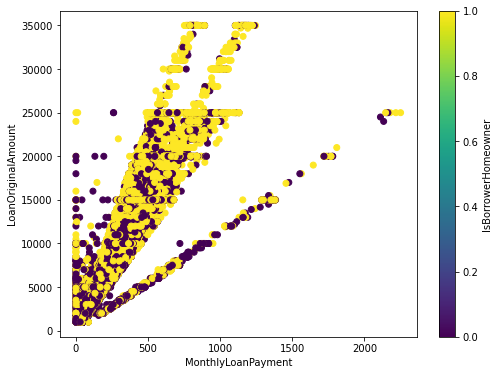

In [55]:
#plot in respect to Borrower Home ownership
plt.figure(figsize = [8,6])
plt.scatter(data = df_loan_clean, x = 'MonthlyLoanPayment', y = 'LoanOriginalAmount',
                c = 'IsBorrowerHomeowner')
plt.colorbar(label = 'IsBorrowerHomeowner')
plt.ylabel('LoanOriginalAmount')
plt.xlabel('MonthlyLoanPayment')
plt.show();

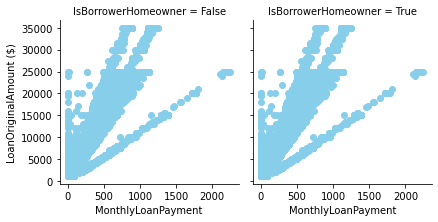

In [56]:
#Split for more insight
graph = sb.FacetGrid(data = df_loan_clean, col = 'IsBorrowerHomeowner')
graph.map(plt.scatter,data = df_loan_clean, y = 'LoanOriginalAmount', x = 'MonthlyLoanPayment', color = 'skyblue')
graph.set_xlabels('MonthlyLoanPayment')
graph.set_ylabels('LoanOriginalAmount ($)')
plt.show()

> Observation :
     >> there is no significant pattern if a borrower home status ownership affects loan amount and monthly loan payment

Text(0.5, 0, 'MonthlyLoanPayment')

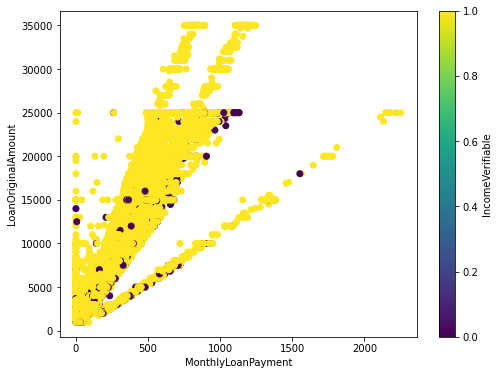

In [57]:
#plot in respect to Income Verifiable
plt.figure(figsize = [8,6])
plt.scatter(data = df_loan_clean, x = 'MonthlyLoanPayment', y = 'LoanOriginalAmount',
                c = 'IncomeVerifiable')
plt.colorbar(label = 'IncomeVerifiable')
plt.ylabel('LoanOriginalAmount')
plt.xlabel('MonthlyLoanPayment')

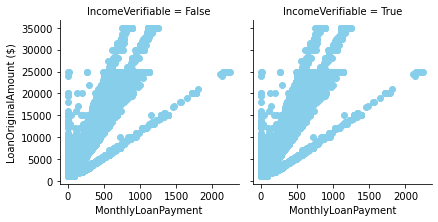

In [58]:
#split above plot for more insight
graph = sb.FacetGrid(data = df_loan_clean, col = 'IncomeVerifiable')
graph.map(plt.scatter,data = df_loan_clean, y = 'LoanOriginalAmount', x = 'MonthlyLoanPayment', color = 'skyblue')
graph.set_xlabels('MonthlyLoanPayment')
graph.set_ylabels('LoanOriginalAmount ($)')
plt.show()

> Observation :
     >> there is no significant pattern if a verified Income affects loan amount and monthly loan payment

###  Insight from Multivariate Exploration:

> All the employment status category had a positive correlation in respect to Monthly Loan payment and original loan amount. Full-time employees are like to recieve more loans compared to part-time employee. So one's employment status is a key drive in recieving a personal loan. In addition, Income Range above 100,000 dollars tend to have more higher loan amount which is expected because of their income range.

>A huge amount of loan were taken for Debt Consolidation with Home improvemt trailing behind. More borrowers come for loan with the purpose of using it for Debt Consolidation.

> Across all income range the propser rating tends to increase with lower Borrower's Annual Percentage Rate (APR) for the loan. This trend shows a great impact on the Prosper Loan rating based off the Borrower APR and Income range.


> It was surprising to see that there was no distint significant pattern difference if a borrower home status ownership affects loan amount and monthly loan payment and same for the borrower income verification status. One would have expected some difference on the monthly loan payment for the home ownership status.

## Conclusions
>Based of the investigation carried out, the attribute to look out for when giving a loan is the borrower income range, employment status, their proposed monthly payment and the spread between their loan amount and monthly loan payment proposed. With this in place comapnies issue loan will be on a save side based on the analysis carried out on the prosper loan dataset.
